In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.stats import norm

In [ ]:
plt.style.use('ggplot')
ticker = 'AMZN'
data = pd.DataFrame()
data = yf.download(ticker, start="2020-01-01")["Close"]

/tmp/ipython-input-149169492.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01")["Close"]
[*********************100%***********************]  1 of 1 completed


In [ ]:
#retornos logaritmicos
log_returns = np.log(1+data.pct_change().dropna()) #Más facil el modelado estad(retornlog suelen parecerse más a una dist norm).

print(data.head())
print(data.tail())
print(log_returns.head())

Ticker           AMZN
Date                 
2020-01-02  94.900497
2020-01-03  93.748497
2020-01-06  95.143997
2020-01-07  95.343002
2020-01-08  94.598503
Ticker            AMZN
Date                  
2025-08-22  228.839996
2025-08-25  227.940002
2025-08-26  228.710007
2025-08-27  229.119995
2025-08-28  232.195007
Ticker          AMZN
Date                
2020-01-03 -0.012213
2020-01-06  0.014776
2020-01-07  0.002089
2020-01-08 -0.007839
2020-01-09  0.004788


In [ ]:
#definimos para la simulacion
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5*var) # “tendencia” de crecimiento ajustada por riesgo
std = log_returns.std() #volatilidad

dias = 100
pruebas = 1000

z = norm.ppf(np.random.rand(dias, pruebas)) #generamos percentiles y luego sus respectivos valores en la normal
retornos_diaros = np.exp(drift.values + std.values *z) #movimiento geométrico browniano

camino_de_precios = np.zeros_like(retornos_diaros) #Creamos la matriz camino igual a la de retornos
camino_de_precios[0] = data.iloc[-1] # último precio de AMZN

for t in range(1,dias):
  camino_de_precios[t] = camino_de_precios [t-1]*retornos_diaros[t]




In [ ]:
np.savetxt('Camino_de_precios.csv', camino_de_precios[t]) #creamos un csv de los precios

In [ ]:
#Respondemos a la pregunta: ¿Cuál es el rango de precios que podría tener AMZN en 100 días?

#¿Qué tan probable es que suba mucho o que caiga?

#¿Cuál es el precio promedio esperado?

Object `días` not found.
Object `caiga` not found.
Object `esperado` not found.


In [ ]:
#Para responder a las preguntas generamos lo siguiente:

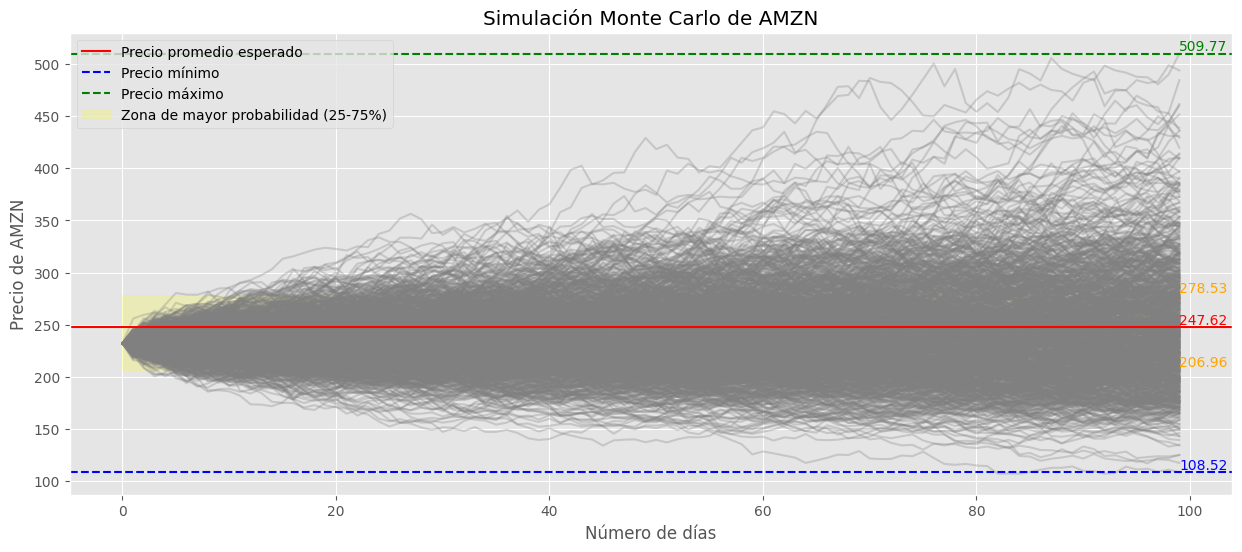

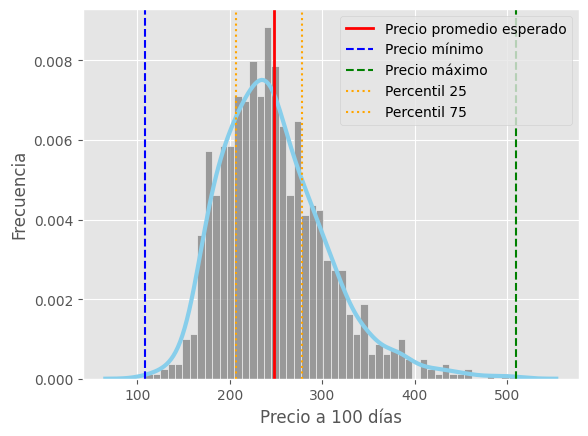

In [ ]:
# Convertimos a DataFrame para manejarlo más fácil
df_camino = pd.DataFrame(camino_de_precios)

# Calculamos estadísticas
precio_final = df_camino.iloc[-1]  # precios al día 100
rango_min = precio_final.min()
rango_max = precio_final.max()
precio_promedio = precio_final.mean()
# Zona de mayor probabilidad: aprox entre el percentil 25 y 75
zona_probabilidad = precio_final.quantile([0.25, 0.75])

# Graficamos los caminos, posibles futuros de AMZN
plt.figure(figsize=(15,6))
plt.plot(df_camino, color='grey', alpha=0.3)
plt.xlabel('Número de días')
plt.ylabel('Precio de ' + ticker)
plt.title('Simulación Monte Carlo de AMZN')

# Linea de precio promedio
plt.axhline(precio_promedio, color='red', label='Precio promedio esperado')
plt.text(dias-1, precio_promedio, f'{precio_promedio:.2f}', color='red', fontsize=10, va='bottom')

# Líneas del rango máximo y mínimo
plt.axhline(rango_min, color='blue', linestyle='dashed', label='Precio mínimo')
plt.axhline(rango_max, color='green', linestyle='dashed', label='Precio máximo')
plt.text(dias-1, rango_min, f'{rango_min:.2f}', color='blue', fontsize=10, va='bottom')
plt.text(dias-1, rango_max, f'{rango_max:.2f}', color='green', fontsize=10, va='bottom')

# Zona de mayor probabilidad
plt.fill_between(range(dias), zona_probabilidad[0.25], zona_probabilidad[0.75], color='yellow', alpha=0.2, label='Zona de mayor probabilidad (25-75%)')
plt.text(dias-1, zona_probabilidad[0.25], f'{zona_probabilidad[0.25]:.2f}', color='orange', fontsize=10, va='bottom')
plt.text(dias-1, zona_probabilidad[0.75], f'{zona_probabilidad[0.75]:.2f}', color='orange', fontsize=10, va='bottom')

plt.legend()
plt.show()

# Histograma de precios al día final con líneas
sns.histplot(precio_final, bins=50, color='gray', stat= 'density')
sns.kdeplot(precio_final, color='skyblue', lw=3)
plt.axvline(precio_promedio, color='red', lw=2, label='Precio promedio esperado')
plt.axvline(rango_min, color='blue', lw=2, linestyle='dashed', label='Precio mínimo')
plt.axvline(rango_max, color='green', lw=2, linestyle='dashed', label='Precio máximo')
plt.axvline(zona_probabilidad[0.25], color='orange', linestyle='dotted', label='Percentil 25')
plt.axvline(zona_probabilidad[0.75], color='orange', linestyle='dotted', label='Percentil 75')
plt.xlabel(f'Precio a {dias} días')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()
